In [52]:
import pandas as pd
df = pd.read_csv('dns_logs.txt.gz', compression='gzip', sep="\t", header=None)
df.columns = ["times", "ip", "domain"]
df['times'] = pd.to_datetime(df['times'], unit='s')
df["tdiff"] = df.groupby(["ip","domain"])["times"].diff()
df["tdiff"] = df["tdiff"].astype("int64")
df["tdiff"] = df["tdiff"].apply(lambda x: pd.NA if x < 0 else x)
df.dropna(inplace=True)
vs = {}
for n, grp in df.groupby(["domain","ip"]):
    if len(grp) > 50:
        vs[n] = grp["tdiff"].var()
vs_df = pd.Series(vs)
# vs_df = vs_df.iloc[:10]
vs_df
# print(", ".join(vs_df["level_1"].sort_values().unique()))

c2.robotland.org           130.207.47.207     9.980911e+17
                           143.215.58.72      9.732116e+17
hamma.doubutsutaikai.jp    130.207.243.14     1.033790e+18
mx.yellowjello.br          143.215.182.109    8.709778e+17
                           143.215.26.32      8.415805e+17
not4u.mechaworld.ru        128.61.188.8       1.029931e+18
                           130.207.213.18     9.845405e+17
                           143.215.0.38       1.080880e+18
www.tanglerootinn.in.ua    128.61.54.78       1.042951e+18
                           130.207.106.45     1.027235e+18
yhexyweqm.picklepalace.mx  128.61.230.93      9.294209e+17
dtype: float64

In [51]:
vs_df

,index,level_0,level_1,0
0,0,c2.robotland.org,130.207.47.207,9.980911e+17
1,1,c2.robotland.org,143.215.58.72,9.732116e+17
2,2,hamma.doubutsutaikai.jp,130.207.243.14,1.033790e+18
3,3,mx.yellowjello.br,143.215.182.109,8.709778e+17
4,4,mx.yellowjello.br,143.215.26.32,8.415805e+17
5,5,not4u.mechaworld.ru,128.61.188.8,1.029931e+18
6,6,not4u.mechaworld.ru,130.207.213.18,9.845405e+17
7,7,not4u.mechaworld.ru,143.215.0.38,1.080880e+18
8,8,www.tanglerootinn.in.ua,128.61.54.78,1.042951e+18
9,9,www.tanglerootinn.in.ua,130.207.106.45,1.027235e+18


In [50]:
import hashlib

st = "128.61.188.8, 128.61.54.78, 130.207.106.45, 130.207.213.18, 130.207.243.14, 130.207.47.207, 143.215.0.38, 143.215.182.109, 143.215.26.32, 143.215.58.72, c2.robotland.org, hamma.doubutsutaikai.jp, mx.yellowjello.br, not4u.mechaworld.ru, www.tanglerootinn.in.ua"
hsash = hashlib.md5(st.encode('utf-8')).hexdigest()
hsash

'3992f44d9493d982e903269370724cfd'

In [26]:
candidates = vs_df.nsmallest(10).reset_index()

In [28]:
candidates = candidates["level_1"]

In [157]:
cand = df[df["ip"].isin(set(candidates))]["domain"].unique()

In [159]:
len(cand)

7548

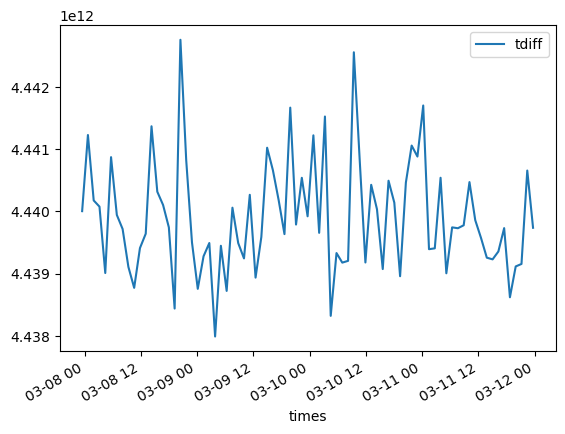

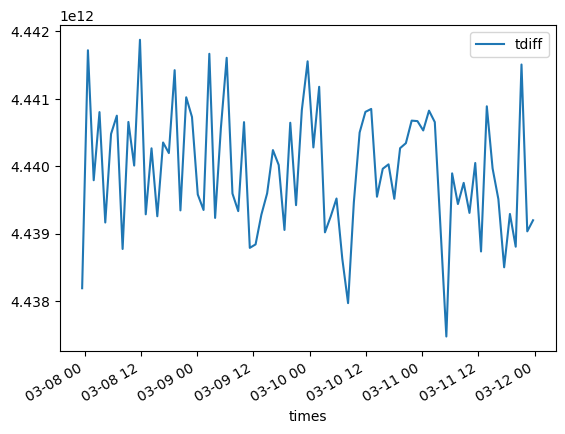

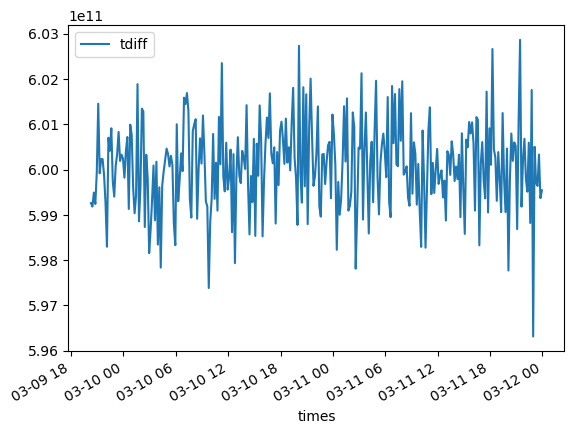

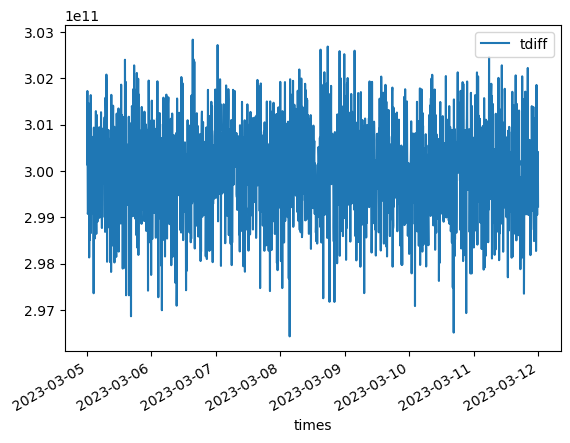

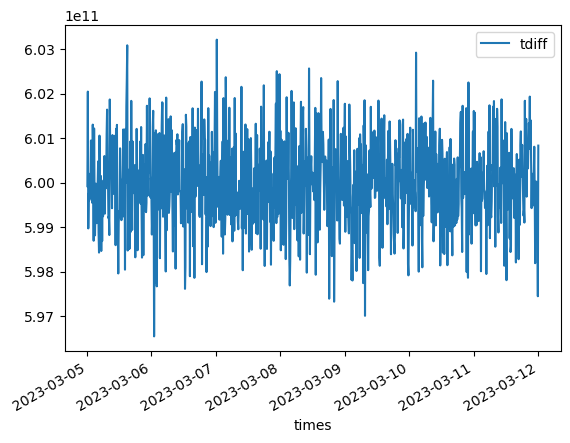

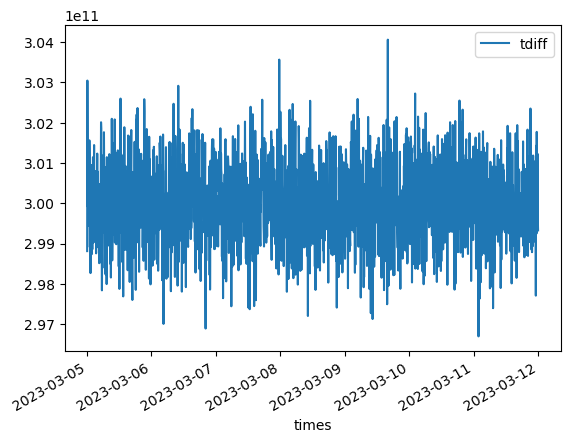

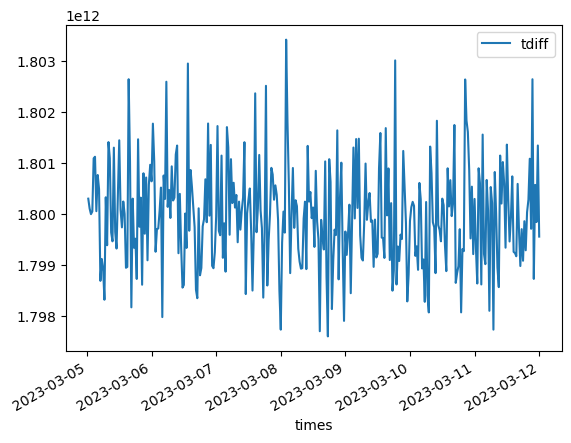

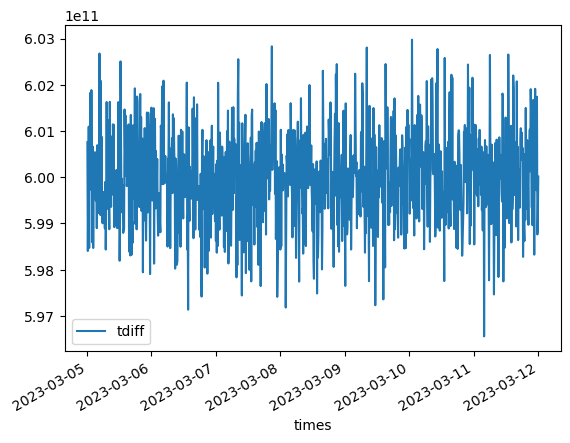

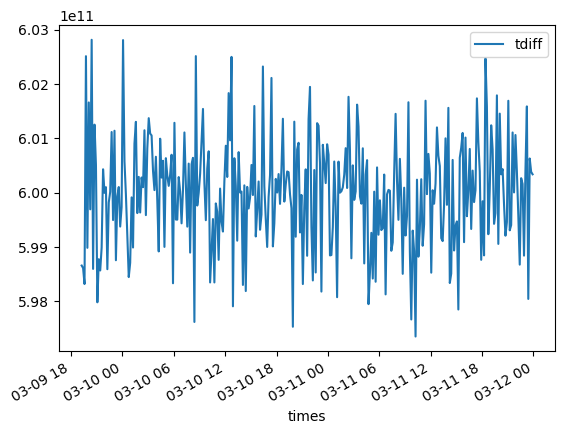

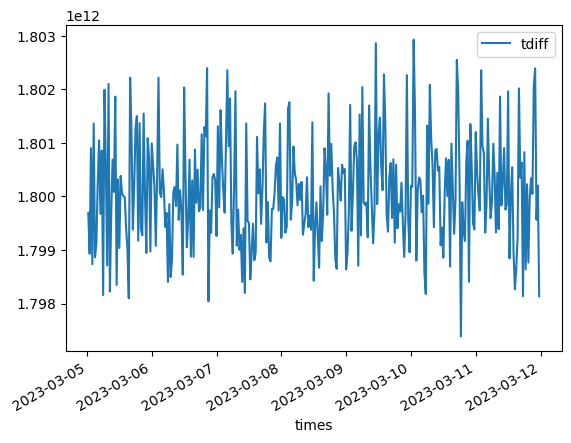

In [29]:
i = 0
for c in candidates:
    # try:
        # if len(df[df['ip']==c]) < 10:
        #     continue
    df[df['ip']==c].plot(x='times', y='tdiff')
    i += 1
    # except :
    #     continue
    if i == 10:
        break

In [ ]:
# Get the frequency of unique requests by each user to each domain
sizes = df.groupby([df[1], df[2]],as_index=False).size()

In [ ]:
sizes.sort_values(by='size', ascending=False)

,1,2,size
9054846,143.215.58.72,c2.robotland.org,2017
5861665,130.207.47.207,c2.robotland.org,2016
4828480,130.207.213.18,not4u.mechaworld.ru,1009
1064510,128.61.188.8,not4u.mechaworld.ru,1009
6520614,143.215.0.38,not4u.mechaworld.ru,1008
...,...,...,...
3175412,130.207.114.135,edge.youtubetob.com,1
3175413,130.207.114.135,encrypted-tbn3.leguide.com,1
3175414,130.207.114.135,external-preview.multitran.ru,1
3175415,130.207.114.135,googleads.about.com,1


In [ ]:
sizes[sizes['size']>2]

,1,2,size
1064510,128.61.188.8,not4u.mechaworld.ru,1009
1570886,128.61.230.93,yhexyweqm.picklepalace.mx,312
2187098,128.61.54.78,www.tanglerootinn.in.ua,336
3082992,130.207.106.45,www.tanglerootinn.in.ua,337
4828480,130.207.213.18,not4u.mechaworld.ru,1009
5175746,130.207.243.14,hamma.doubutsutaikai.jp,318
5861665,130.207.47.207,c2.robotland.org,2016
6520614,143.215.0.38,not4u.mechaworld.ru,1008
7499578,143.215.182.109,mx.yellowjello.br,80
8656626,143.215.26.32,mx.yellowjello.br,80


In [ ]:
# All of the domains with more than 2 requests from the same IP are always accessed many times, never just once or twice.
# Show this:
problems = sizes[sizes['size']>2]
for dom in problems[2].unique().tolist():
    print('domain:', dom, '| unique IPs:', len(sizes[sizes[2]==dom]), '| min. requests:', min(sizes[sizes[2]==dom]['size']))

domain: not4u.mechaworld.ru | unique IPs: 3 | min. requests: 1008
domain: yhexyweqm.picklepalace.mx | unique IPs: 1 | min. requests: 312
domain: www.tanglerootinn.in.ua | unique IPs: 2 | min. requests: 336
domain: hamma.doubutsutaikai.jp | unique IPs: 1 | min. requests: 318
domain: c2.robotland.org | unique IPs: 2 | min. requests: 2016
domain: mx.yellowjello.br | unique IPs: 2 | min. requests: 80


In [ ]:
# Sure enough, these domains are only accessed by a select few IPs and always have many requests.
# Prepare the answers:
import ipaddress
import hashlib

iplist = problems[1].unique().tolist()
domlist = problems[2].unique().tolist()

ipsorted = [str(x) for x in sorted(ipaddress.ip_address(ip) for ip in iplist)]
domsorted = sorted(domlist)

hashinput = ", ".join(ipsorted + domsorted)
answer_hash = hashlib.md5(hashinput.encode('utf-8')).hexdigest()
print(answer_hash) # => 'd209f629770e87c8c5834f890022fd44'

2221e46d1063a69dfe861c620d2b2851
